In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import glob
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#The purpose of this code is to analyze what teams performed the best during the 2010s

In [23]:
#load in team standings data and adjust to add a column for pts/82, GF/G and GA/G
team_standings_data = pd.read_csv("data/nhl_standings.csv")

#create a column for pts/82 games played to account for the lockout shortened 2012-13 season
team_standings_data["pts/82"] = np.where(
    team_standings_data["GP"] != 82,
    ((team_standings_data["Points%"]/100) * (82*2)).round().astype(int),
    team_standings_data["Points"]
)
team_standings_data.head()

,Name,Team,Season,GP,TOI,W,L,OL,ROW,Points,Points%,GF,GA,G±,Sh%,Sv%,pts/82
0,Blackhawks,CHI,12-13,48,2945.4,36,7,5,30,77,80.2,155,102,53,10.0,92.3,132
1,Lightning,T.B,18-19,82,4979.6,62,16,4,56,128,78.0,325,222,103,12.2,91.6,128
2,Penguins,PIT,12-13,48,2898.4,36,12,0,33,72,75.0,165,119,46,11.3,91.5,123
3,Capitals,WSH,15-16,82,4982.7,56,18,8,52,120,73.2,252,193,59,9.9,91.8,120
4,Capitals,WSH,16-17,82,4973.1,55,19,8,53,118,72.0,263,182,81,10.5,92.2,118


In [24]:
#groupby team to find the team that averaged the most points over the decade, most goals and fewest goals against
team_standings_avg = (
    team_standings_data
    .groupby(["Team"])
    .agg({
        "W":"mean",
        "pts/82":"mean",
        "GF":"mean",
        "GA":"mean",
        "Sh%":"mean",
        "Sv%":"mean"
    }
    ).round(1).reset_index()
)
team_standings_avg = team_standings_avg.sort_values(by = "pts/82", ascending=[True])

team_standings_avg.head(5)

,Team,W,pts/82,GF,GA,Sh%,Sv%
4,BUF,30.3,74.4,192.6,237.1,8.1,91.0
12,EDM,30.9,74.7,205.2,243.2,9.0,90.3
2,ATL,34.0,80.0,223.0,269.0,8.4,90.1
1,ARI,33.3,81.3,198.3,227.6,8.4,91.1
9,COL,35.6,82.2,213.2,234.2,8.9,90.7


In [25]:
#create a plot to display the teams with most pts/82 games played

#load in logos
logos = pd.read_csv("Logos/logos.csv")

#join data with team_standings
team_standings_plot = pd.merge(team_standings_avg, logos, left_on="Team", right_on="team", how="inner")

team_standings_avg["logo"] = 'Logos/' + team_standings_avg['Team'] + '.png'

Text(0.5, 1.0, 'Team Performance During the 2010s')

Text(0.5, 0, 'Average Goals For')

Text(0, 0.5, 'Avergae Goals Against')

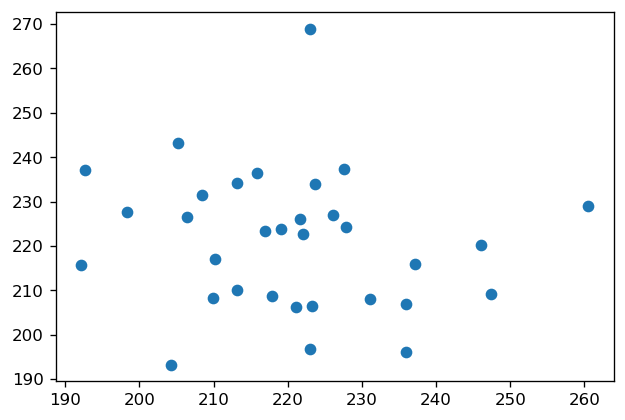

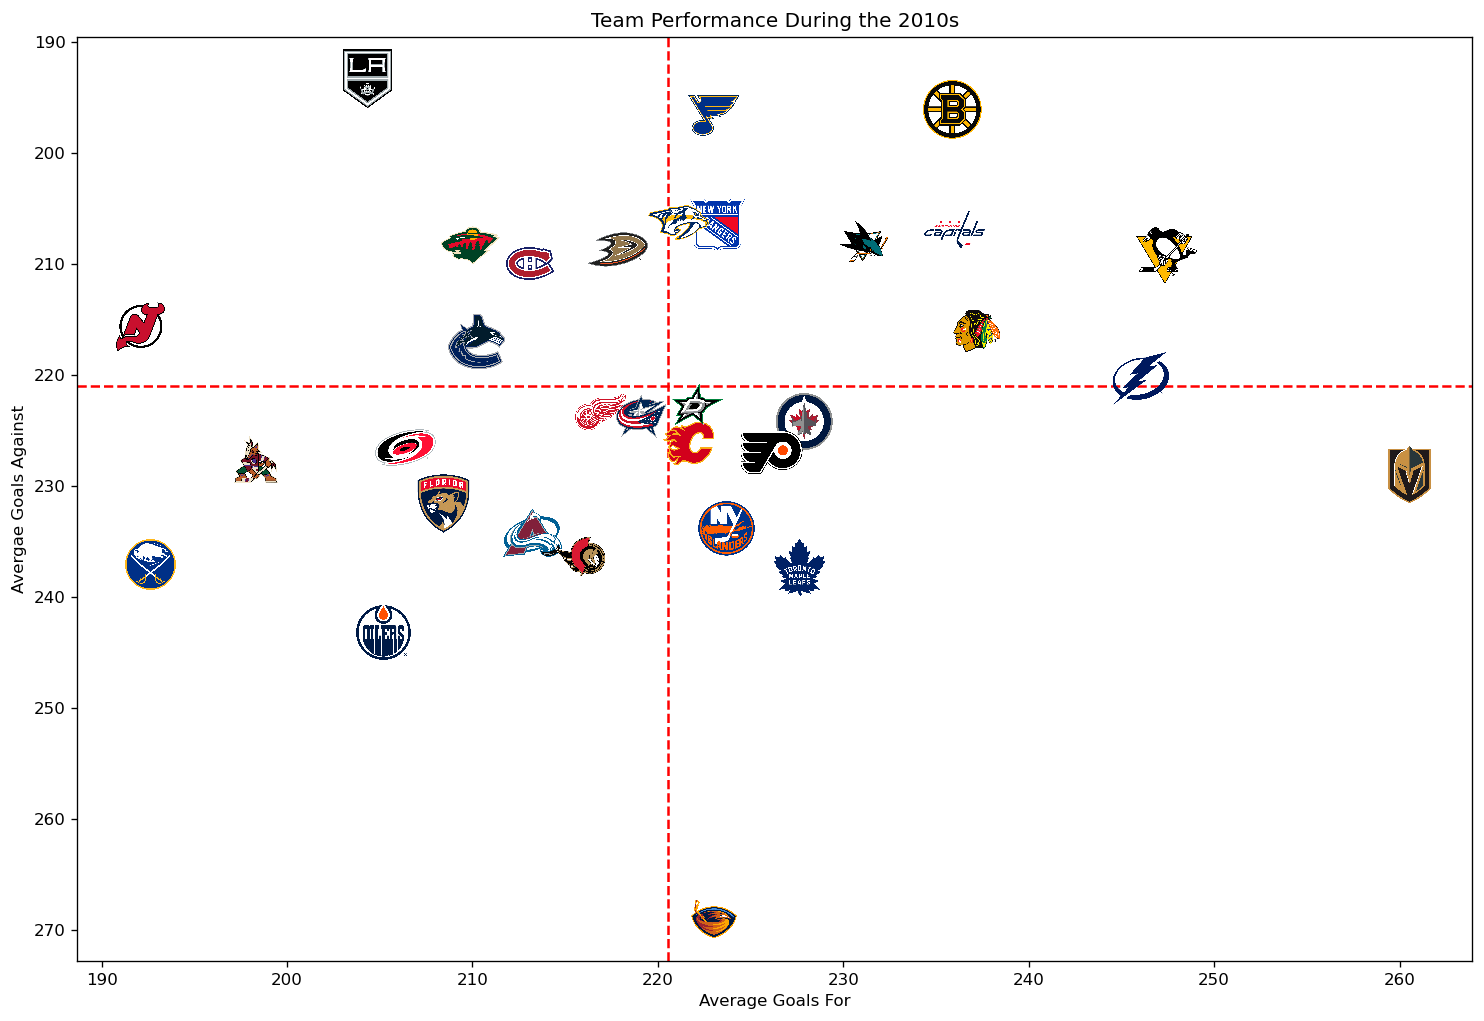

In [30]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(team_standings_avg['GF'], team_standings_avg['GA'])
def getImage(logo):
    return OffsetImage(plt.imread(logo), zoom=.025, alpha = 1)

fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(team_standings_avg['GF'], team_standings_avg['GA'], color='white')

for index, row in team_standings_avg.iterrows():
    ab = AnnotationBbox(getImage(row['logo']), (row['GF'], row['GA']), frameon=False)
    ax.add_artist(ab)

plt.gcf().set_size_inches((15, 10)) 
plt.gca().invert_yaxis()
plt.title(f"Team Performance During the 2010s")
plt.xlabel('Average Goals For')
plt.ylabel('Avergae Goals Against')
#for i in range(new_df.shape[0]):
          #plt.text(new_df.gsax[i], y=new_df.gsax_variance[i], s=new_df.name[i], alpha=0.8)
plt.axvline(x=team_standings_avg['GF'].mean(), color='r', linestyle='--')
plt.axhline(y=team_standings_avg['GA'].mean(), color='r', linestyle='--')
#plt.savefig('goals_plot.png', dpi=1200, bbox_inches = "tight")

<Figure size 900x1000 with 0 Axes>

<BarContainer object of 32 artists>

Text(0.5, 0, 'Points per 82 GP')

Text(0, 0.5, 'Team')

Text(0.5, 1.0, 'Performance of Teams During the 2010s')

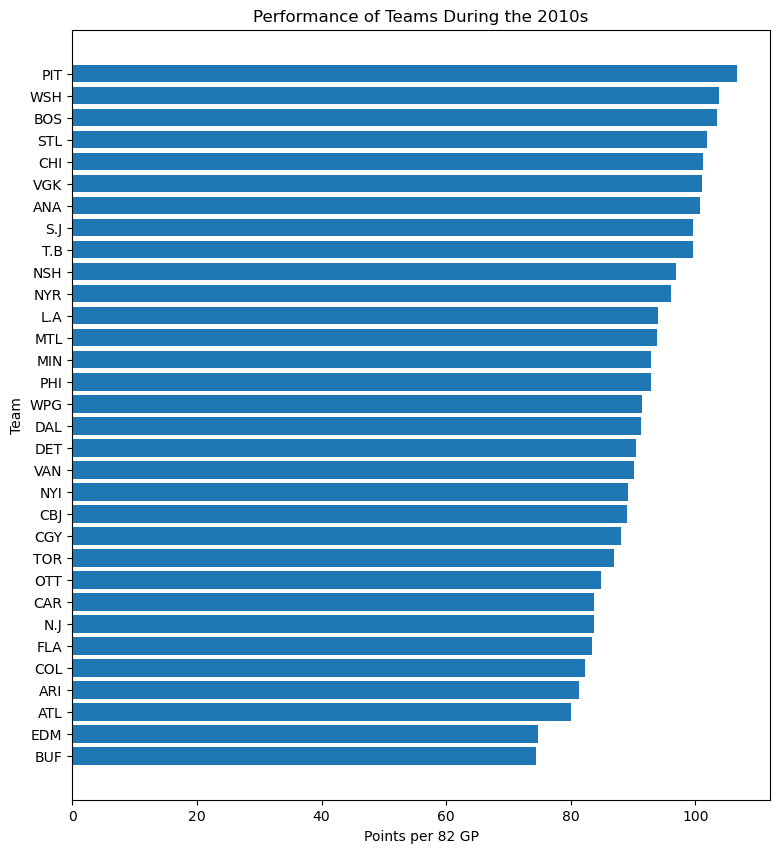

In [6]:
#Create a bar plot using GSAx and Player data from Goalie dataframe.
plt.figure(figsize=(9,10)) 
plt.barh(y=team_standings_avg['Team'], 
        width=team_standings_avg['pts/82'])
plt.xlabel('Points per 82 GP')
plt.ylabel('Team')
plt.title('Performance of Teams During the 2010s')
#plt.savefig("points_bar.png", dpi=1200)
plt.show()


In [7]:
#load in team underlying stats
team_stats_data = pd.read_csv("data/nhl_team_stats.csv")
team_stats_data

,Name,Team,Season,GP,TOI,GF%,SF%,FF%,CF%,xGF%,...,CA/60,xGF/60,xGA/60,G±/60,S±/60,F±/60,C±/60,xG±/60,Sh%,Sv%
0,Ducks,ANA,10-11,82,3852.27,46.34,45.92,45.12,44.46,45.15,...,58.86,2.07,2.51,-0.33,-4.69,-7.93,-11.75,-0.44,7.85,92.28
1,Coyotes,ARI,10-11,82,3863.57,53.87,49.67,49.51,50.36,48.57,...,55.92,2.27,2.41,0.35,-0.40,-0.84,0.82,-0.13,8.02,93.23
2,Thrashers,ATL,10-11,82,3910.83,45.55,48.96,49.57,48.40,47.17,...,58.15,2.27,2.55,-0.41,-1.28,-0.71,-3.61,-0.27,7.04,91.93
3,Bruins,BOS,10-11,82,3935.40,59.07,50.69,50.73,51.42,50.33,...,56.74,2.34,2.31,0.83,0.88,1.26,3.31,0.03,8.27,94.11
4,Sabres,BUF,10-11,82,3853.65,53.03,52.07,50.79,50.50,50.66,...,55.07,2.30,2.24,0.29,2.56,1.33,1.11,0.06,7.81,92.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,Maple Leafs,TOR,18-19,82,4083.82,54.86,49.59,50.40,52.12,51.71,...,59.88,2.77,2.59,0.54,-0.54,0.74,5.31,0.18,9.40,92.39
268,Canucks,VAN,18-19,82,3955.63,45.02,46.79,47.56,47.34,45.81,...,59.37,2.13,2.52,-0.48,-3.87,-4.09,-6.01,-0.39,7.76,91.66
269,Golden Knights,VGK,18-19,82,4013.77,51.74,54.01,54.37,54.56,54.95,...,52.32,2.79,2.29,0.17,4.98,7.39,10.49,0.50,7.66,91.61
270,Jets,WPG,18-19,82,3955.85,50.84,48.82,49.16,49.42,47.78,...,57.86,2.29,2.51,0.08,-1.47,-1.44,-1.33,-0.21,8.34,92.31


In [8]:
#groupby team to find the team that averaged the most points over the decade, most goals and fewest goals against
team_stats_avg = (
    team_stats_data
    .groupby(["Team"])
    .agg({
        "xGF/60":"mean",
        "xGA/60":"mean",
        "CF/60":"mean",
        "CA/60":"mean"
    }
    ).round(2).reset_index()
)
#team_stats_avg = team_standings_avg.sort_values(by = "pts/82", ascending=[False])

team_stats_avg

,Team,xGF/60,xGA/60,CF/60,CA/60,Sh%,Sv%
0,ANA,2.29,2.33,53.54,55.57,8.02,92.51
1,ARI,2.14,2.41,54.75,58.30,7.28,92.66
2,ATL,2.27,2.55,54.54,58.15,7.04,91.93
3,BOS,2.32,2.07,59.32,51.65,7.71,92.84
4,BUF,1.99,2.36,49.60,58.80,7.08,92.42
5,CAR,2.51,2.51,58.50,55.66,7.11,91.70
6,CBJ,2.25,2.25,52.84,54.55,7.96,92.25
7,CGY,2.24,2.26,54.03,56.04,8.02,91.50
8,CHI,2.37,2.29,58.04,51.94,7.85,92.30
9,COL,2.07,2.35,52.23,58.85,7.69,92.25


,Team,xGF/60,xGA/60,CF/60,CA/60,Sh%,Sv%,logo
0,ANA,2.29,2.33,53.54,55.57,8.02,92.51,Logos/ANA.png
1,ARI,2.14,2.41,54.75,58.30,7.28,92.66,Logos/ARI.png
2,ATL,2.27,2.55,54.54,58.15,7.04,91.93,Logos/ATL.png
3,BOS,2.32,2.07,59.32,51.65,7.71,92.84,Logos/BOS.png
4,BUF,1.99,2.36,49.60,58.80,7.08,92.42,Logos/BUF.png
5,CAR,2.51,2.51,58.50,55.66,7.11,91.70,Logos/CAR.png
6,CBJ,2.25,2.25,52.84,54.55,7.96,92.25,Logos/CBJ.png
7,CGY,2.24,2.26,54.03,56.04,8.02,91.50,Logos/CGY.png
8,CHI,2.37,2.29,58.04,51.94,7.85,92.30,Logos/CHI.png
9,COL,2.07,2.35,52.23,58.85,7.69,92.25,Logos/COL.png


Text(0.5, 1.0, 'Team Performance During the 2010s')

Text(0.5, 0, 'Average xGoals For per 60')

Text(0, 0.5, 'Avergae xGoals Against per 60')

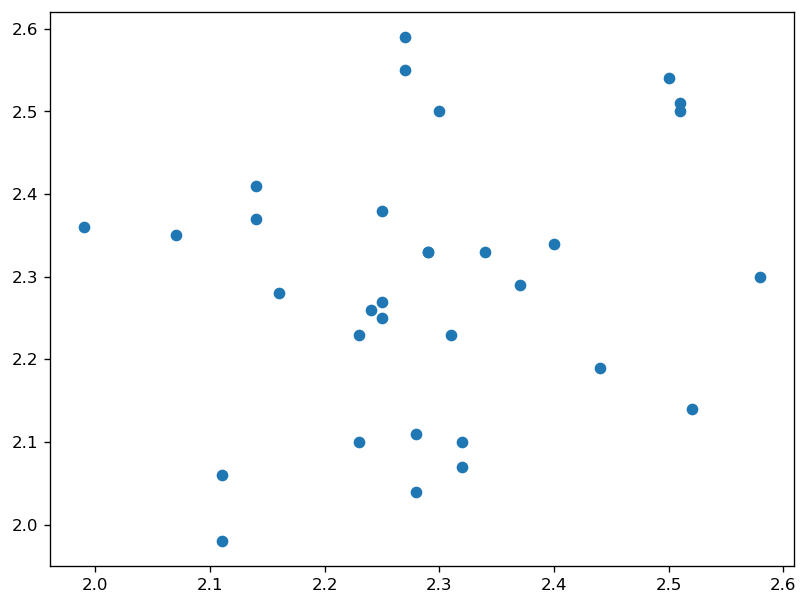

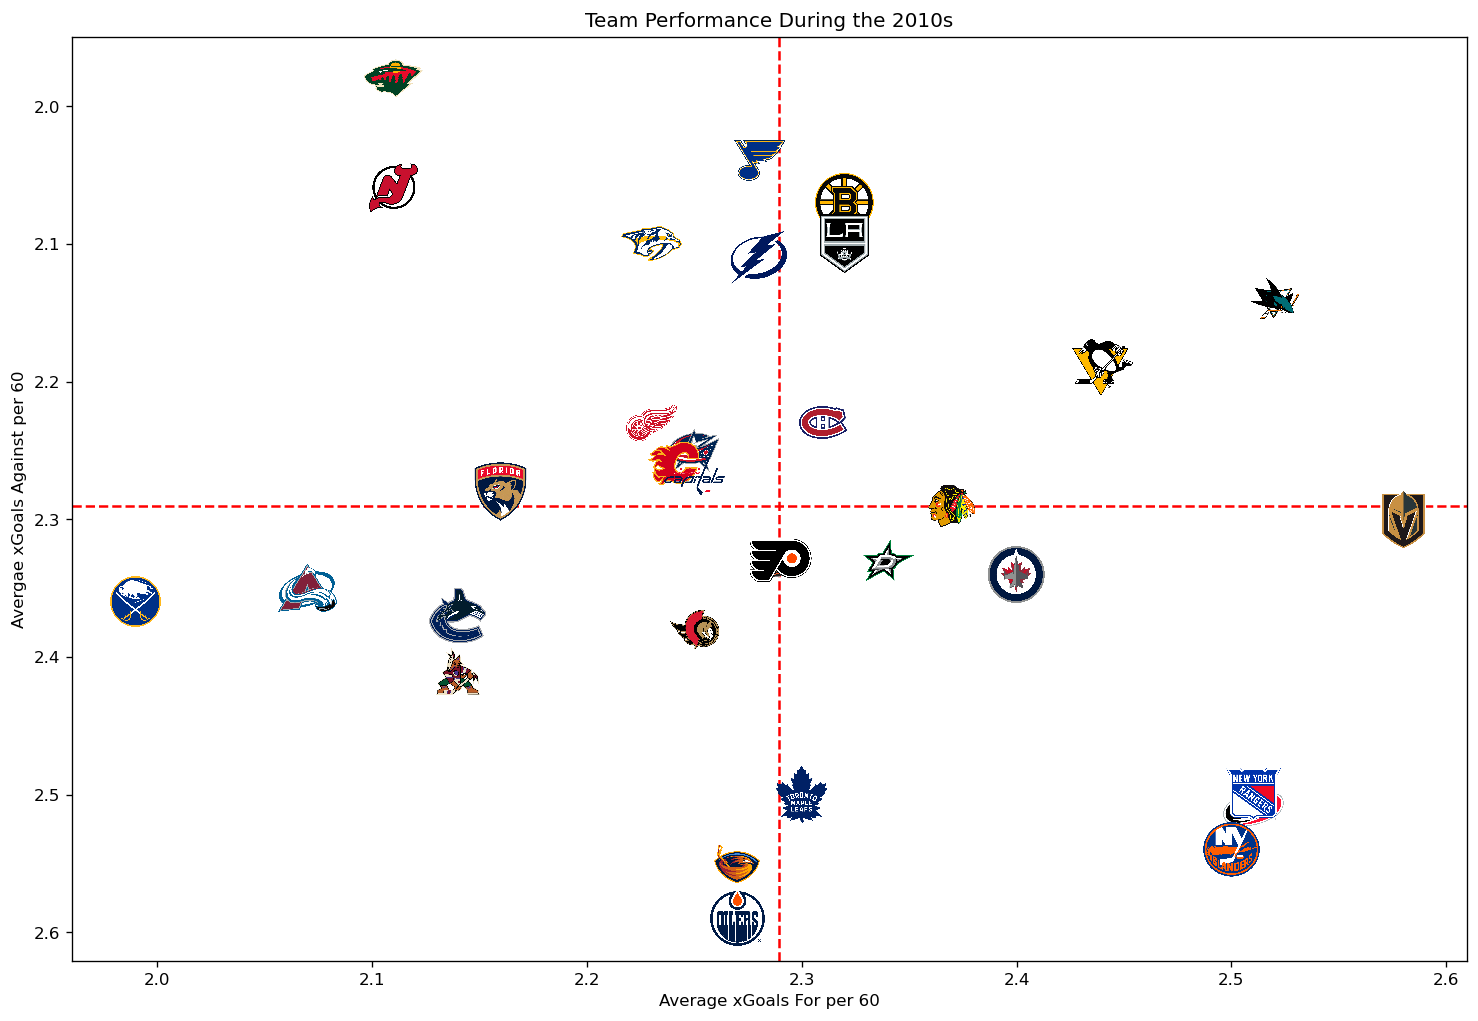

In [9]:
#plot the xGF/60 and xGA/60 of teams
team_stats_avg["logo"] = 'Logos/' + team_stats_avg['Team'] + '.png'

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
ax.scatter(team_stats_avg['xGF/60'], team_stats_avg['xGA/60'])
def getImage(logo):
    return OffsetImage(plt.imread(logo), zoom=.025, alpha = 1)

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
ax.scatter(team_stats_avg['xGF/60'], team_stats_avg['xGA/60'], color='white')

for index, row in team_stats_avg.iterrows():
    ab = AnnotationBbox(getImage(row['logo']), (row['xGF/60'], row['xGA/60']), frameon=False)
    ax.add_artist(ab)

plt.gcf().set_size_inches((15, 10)) 
plt.gca().invert_yaxis()
plt.title(f"Team Performance During the 2010s")
plt.xlabel('Average xGoals For per 60')
plt.ylabel('Avergae xGoals Against per 60')
#for i in range(new_df.shape[0]):
          #plt.text(new_df.gsax[i], y=new_df.gsax_variance[i], s=new_df.name[i], alpha=0.8)
plt.axvline(x=team_stats_avg['xGF/60'].mean(), color='r', linestyle='--')
plt.axhline(y=team_stats_avg['xGA/60'].mean(), color='r', linestyle='--')
#plt.savefig('xG_plot.png', dpi=1200, bbox_inches = "tight")

,Team,xGF/60,xGA/60,CF/60,CA/60,Sh%,Sv%,logo
0,ANA,2.29,2.33,53.54,55.57,8.02,92.51,Logos/ANA.png
1,ARI,2.14,2.41,54.75,58.30,7.28,92.66,Logos/ARI.png
2,ATL,2.27,2.55,54.54,58.15,7.04,91.93,Logos/ATL.png
3,BOS,2.32,2.07,59.32,51.65,7.71,92.84,Logos/BOS.png
4,BUF,1.99,2.36,49.60,58.80,7.08,92.42,Logos/BUF.png
5,CAR,2.51,2.51,58.50,55.66,7.11,91.70,Logos/CAR.png
6,CBJ,2.25,2.25,52.84,54.55,7.96,92.25,Logos/CBJ.png
7,CGY,2.24,2.26,54.03,56.04,8.02,91.50,Logos/CGY.png
8,CHI,2.37,2.29,58.04,51.94,7.85,92.30,Logos/CHI.png
9,COL,2.07,2.35,52.23,58.85,7.69,92.25,Logos/COL.png


Text(0.5, 1.0, 'Team Performance During the 2010s')

Text(0.5, 0, 'Average Corsi For per 60')

Text(0, 0.5, 'Avergae Corsi Against per 60')

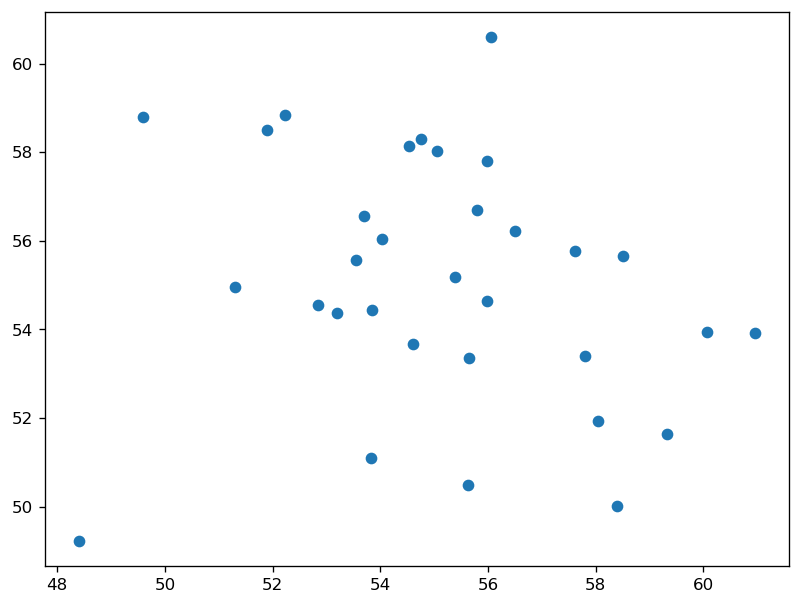

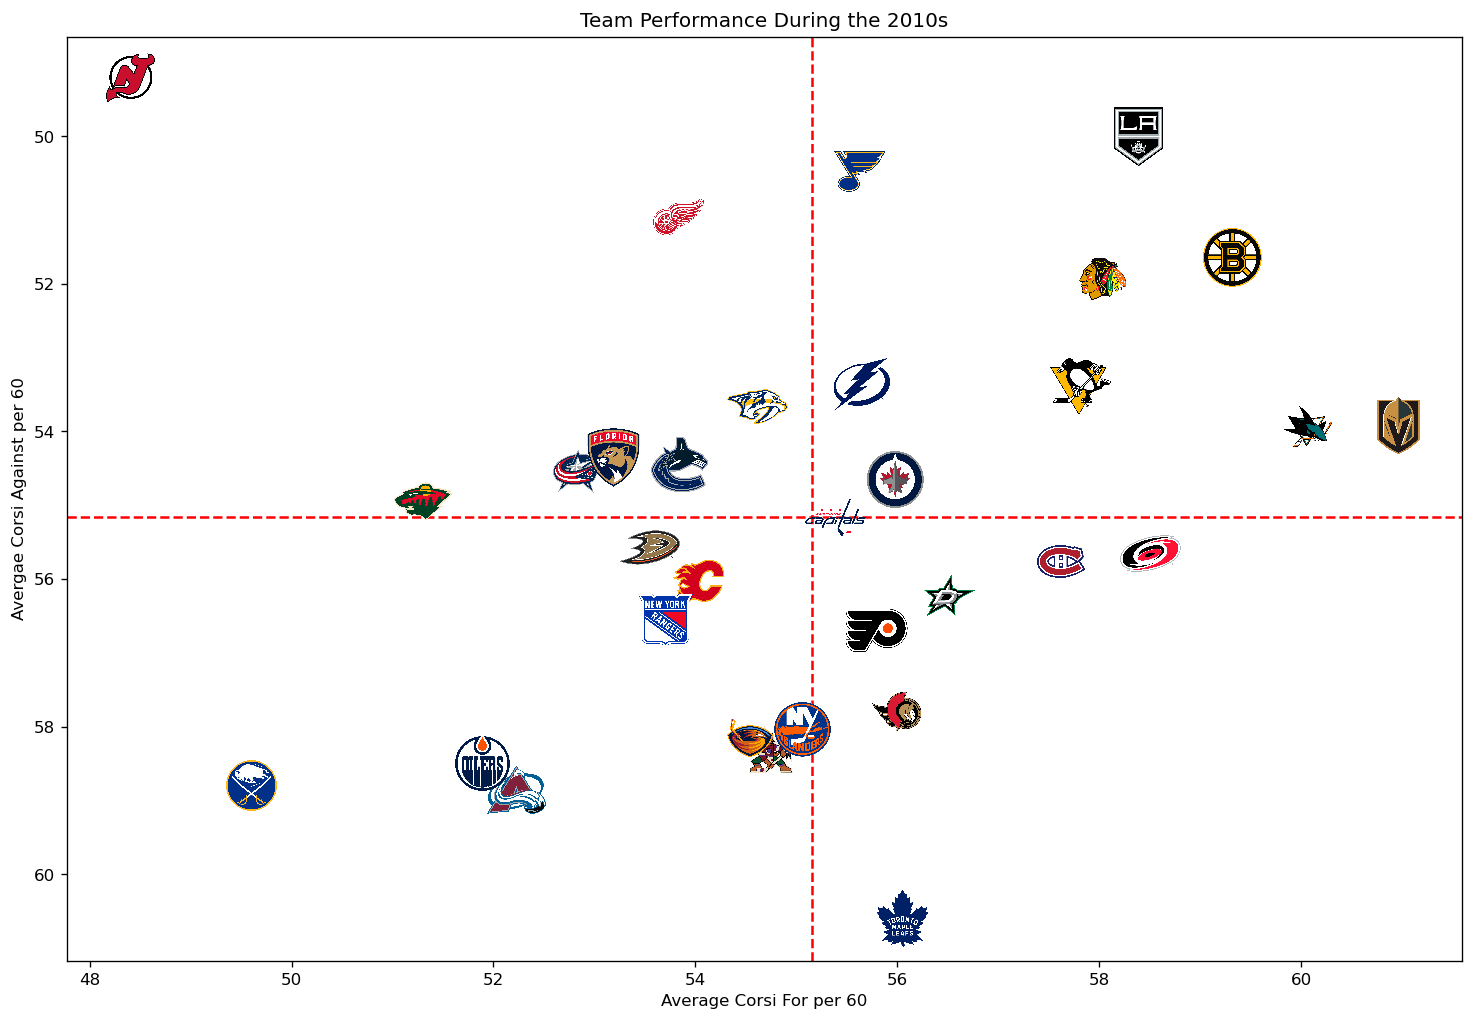

In [10]:
#plot the CF/60 and CA/60 of teams
#team_stats_avg["logo"] = 'Logos/' + team_stats_avg['Team'] + '.png'

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
ax.scatter(team_stats_avg['CF/60'], team_stats_avg['CA/60'])
def getImage(logo):
    return OffsetImage(plt.imread(logo), zoom=.025, alpha = 1)

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
ax.scatter(team_stats_avg['CF/60'], team_stats_avg['CA/60'], color='white')

for index, row in team_stats_avg.iterrows():
    ab = AnnotationBbox(getImage(row['logo']), (row['CF/60'], row['CA/60']), frameon=False)
    ax.add_artist(ab)

plt.gcf().set_size_inches((15, 10)) 
plt.gca().invert_yaxis()
plt.title(f"Team Performance During the 2010s")
plt.xlabel('Average Corsi For per 60')
plt.ylabel('Avergae Corsi Against per 60')
#for i in range(new_df.shape[0]):
          #plt.text(new_df.gsax[i], y=new_df.gsax_variance[i], s=new_df.name[i], alpha=0.8)
plt.axvline(x=team_stats_avg['CF/60'].mean(), color='r', linestyle='--')
plt.axhline(y=team_stats_avg['CF/60'].mean(), color='r', linestyle='--')
#plt.savefig('corsi_plot.png', dpi=1200, bbox_inches = "tight")

Text(0.5, 1.0, 'Team Performance During the 2010s')

Text(0.5, 0, 'Average Save %')

Text(0, 0.5, 'Avergae Shooting %')

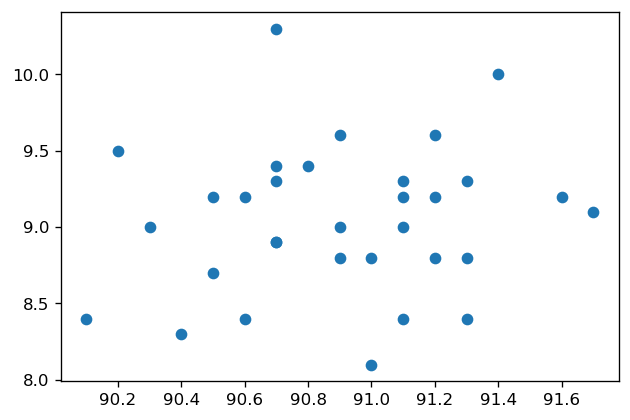

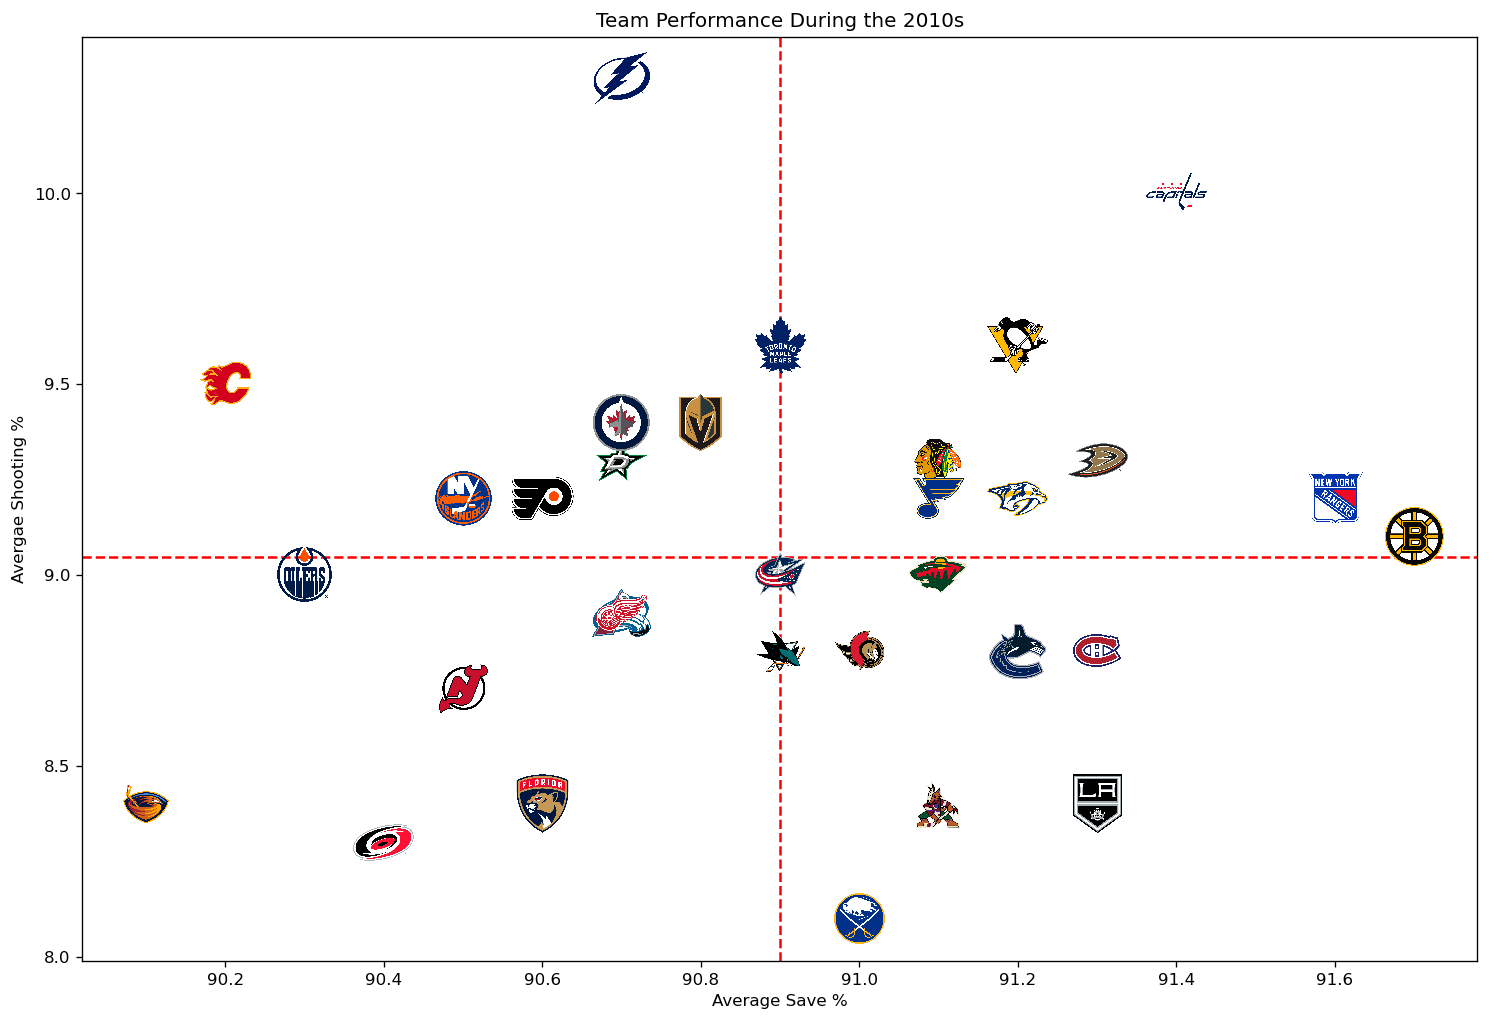

In [38]:
#plot Sv% and Sh% of teams
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(team_standings_avg['Sv%'], team_standings_avg['Sh%'])
def getImage(logo):
    return OffsetImage(plt.imread(logo), zoom=.025, alpha = 1)

fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(team_standings_avg['Sv%'], team_standings_avg['Sh%'], color='white')

for index, row in team_standings_avg.iterrows():
    ab = AnnotationBbox(getImage(row['logo']), (row['Sv%'], row['Sh%']), frameon=False)
    ax.add_artist(ab)

plt.gcf().set_size_inches((15, 10)) 
#plt.gca().invert_yaxis()
plt.title(f"Team Performance During the 2010s")
plt.xlabel('Average Save %')
plt.ylabel('Avergae Shooting %')
#for i in range(new_df.shape[0]):
          #plt.text(new_df.gsax[i], y=new_df.gsax_variance[i], s=new_df.name[i], alpha=0.8)
plt.axvline(x=team_standings_avg['Sv%'].mean(), color='r', linestyle='--')
plt.axhline(y=team_standings_avg['Sh%'].mean(), color='r', linestyle='--')
plt.savefig('PDO.png', dpi=1200, bbox_inches = "tight")